In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import sys
import random
import math
import time
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
class Vertex:
    def __init__(self, node,lon,lat,cont):
      rand = random.randrange(9000,100000)
      self.id = node
      self.adjacent = {} #forma -> tipo nodo vecino: peso 
      # Distancia infinito para todos los nodos (infinito es un random grande)
      self.distance = rand
      self.distanceG = rand
      self.distanceF = rand
      # Todos los nodos inician como no visitados    
      self.visited = False  
      # prev
      self.previous = None
      #longitud y latitud
      self.longitud = lon
      self.latitud = lat
      self.cont = cont #identificador unico para cada vertice (a parte del id)

    def agregar_vecino(self, neighbor, weight=0):
      self.adjacent[neighbor] = weight

    def obtener_conexiones(self): 
      return self.adjacent.keys() #devuelve los vecinos de tipo vertice (no numerico) 

    def obtener_id(self):
      return self.id

    def obtener_peso(self, neighbor):
      return self.adjacent[neighbor]

    def agregar_distancia(self, dist):
      self.distance = dist

    def obtener_distancia(self):
      return self.distance

    def agregar_distanciaG(self, dist):
      self.distanceG = dist

    def obtener_distanciaG(self):
      return self.distanceG

    def agregar_distanciaF(self, dist):
      self.distanceF = dist

    def obtener_distanciaF(self):
      return self.distanceF

    def obtener_lon(self):
      return self.longitud

    def obtener_lat(self):
      return self.latitud

    def agregar_previous(self, prev):
      self.previous = prev

    def visitado(self):
      self.visited = True

    def __str__(self):
      return str(self.id) + ' adjacent: ' + str([x.id for x in self.adjacent])

class Estruc:
  def __init__(self):
    self.camino = []
    self.reemplazo = []
  def obtener_camino(self):
    return self.camino
  def obtener_reemplazo(self):
    return self.reemplazo

class Graph:
  def __init__(self):
    self.vert_dict = {}
    self.num_vertices = 0

  def __iter__(self):
    return iter(self.vert_dict.values())

  def agregar_vertice(self, node,lon,lat,cont):
    self.num_vertices = self.num_vertices + 1
    new_vertex = Vertex(node,lon,lat,cont)
    self.vert_dict[node] = new_vertex
    return new_vertex

  def obtener_vertice(self, n):
    if n in self.vert_dict:
      return self.vert_dict[n]
    else:
      return None

  def agregar_arista(self, frm, to, cost = 0):
    if frm not in self.vert_dict: #nunca llega a este caso
      self.agregar_vertice(frm)
    if to not in self.vert_dict: #nunca llega a este caso
      self.agregar_vertice(to)

    self.vert_dict[frm].agregar_vecino(self.vert_dict[to], cost)
    #self.vert_dict[to].agregar_vecino(self.vert_dict[frm], cost) ############

  def obtener_vertices(self):
    return self.vert_dict.keys()
  
  def obtener_vertices_nodes(self):
    return self.vert_dict.values()

  def agregar_previous(self, u):
    self.previous = u

  def obtener_previous(self, u):
    return self.previous

  def vnsEstructuras(self): #Solo usar cuando el grafo ya tenga todos los nodos y aristas.
    estruc1 = Estruc()
    estruc2 = Estruc()
    for s in self.vert_dict.values():
      for v in s.obtener_conexiones():
        for v2 in s.obtener_conexiones():
          if v2 != v and v in v2.obtener_conexiones():
            if(s.obtener_peso(v2) + v2.obtener_peso(v) > s.obtener_peso(v)):
              estruc2.camino.append([(s,v2),(v2,v)])
              estruc2.reemplazo.append((s,v))
            else:
              estruc1.camino.append((s,v))
              estruc1.reemplazo.append([(s,v2),(v2,v)])
    return estruc1, estruc2

In [3]:
def vns(individuo, estruc1, estruc2):
    k = 0
    estructuras = [estruc1, estruc2]
    while (k < 2):
        i = 0
        while (i < len(individuo) - k - 1):
            if(k == 0):
                if((individuo[i], individuo[i+1]) in estructuras[k].obtener_camino()):
                    pos = estructuras[k].obtener_camino().index((individuo[i],individuo[i+1]))
                    individuo[i:i+2] = (estructuras[k].obtener_reemplazo()[pos][0][0], estructuras[k].obtener_reemplazo()[pos][0][1], estructuras[k].obtener_reemplazo()[pos][1][1])
                    i = 0
                else: i = i+1
            if(k == 1):
                if([(individuo[i], individuo[i+1]),(individuo[i+1], individuo[i+2])] in estructuras[k].obtener_camino()):
                    pos = estructuras[k].obtener_camino().index([(individuo[i], individuo[i+1]),(individuo[i+1], individuo[i+2])])
                    individuo.pop(i+1)
                    i = 0
                else: i = i+1     
        k = k + 1
    return individuo

In [4]:
#N = Número de individuos
# G = Grafo
#s = nodo inicial
#t = nodo final
def esBucle(nodo):
  banderas = []
  adyacentes = nodo.obtener_conexiones()
  for adyacente in adyacentes:
    if adyacente.visited == True:
      banderas.append(True)
    else: banderas.append(False)
  if(len(banderas) == 1): return banderas[0]
  if(len(banderas) == 0): return True #########
  for i in range(len(banderas) - 1):
    if(i == 0):
      respuesta = banderas[i] and banderas[i+1]
    else:
      respuesta = respuesta and banderas[i+1]
  return respuesta

def poblacionInicial(N, s, t, G):
    poblacion = []
    for i in range(N):
        actual = s
        individuo = []
        individuo.insert(0,s)
        actual.visited = True
        while(actual != t):
            adyacentes = list(actual.obtener_conexiones())
            nodo = random.choice(list(adyacentes))
            if(esBucle(nodo) and nodo != t):
                nodo.visited = True
            if(nodo.visited == False):
                if(actual not in individuo):
                    individuo.append(actual)
                individuo.append(nodo)
                nodo.visited = True
                actual = nodo
            if(esBucle(actual) and actual != t):
                actual.visited = True
                actual = individuo.pop()
        poblacion.append(individuo)
        for vertice in list(G.obtener_vertices_nodes()):
            vertice.visited = False
    return poblacion

def f(x):
    return x
def fitness(individuo):
    suma = 0
    for i in range(len(individuo) - 1):
        suma = suma + individuo[i].obtener_peso(individuo[i+1])
    return suma

def crossover(x1, x2, CROSSOVER_RATIO):
    if(random.random()<= CROSSOVER_RATIO):
        a = x1.copy()
        b = x2.copy()
        inicio = x1[0]
        final = x1[-1]
        cortes = []
        for i in range(len(x1)):
            if x1[i] in x2 and x1[i] is not inicio and x1[i] is not final:
                corte1 = i + 1
                for j in range(len(x2)):
                    if x2[j] == x1[corte1 - 1]:
                        corte2 = j + 1
                        cortes.append((corte1,corte2))
        c = random.choice(cortes)
        aux = x1.copy()
        a[c[0]:] = b[c[1]:]
        b[c[1]:] = a[c[0]:]
        return a,b
    return x1,x2

def mutation(x, estruc1, estruc2, MUTATION_RATIO):
  if(random.random()<= MUTATION_RATIO):
    x = vns(x.copy(), estruc1, estruc2)
    return x
  return x

def operaciones_seleccion_proporcional(cadbin, best, num_padres, estruc1, estruc2, CROSSOVER_RATE,MUTATION_RATE):
  #c = np.ndarray([],dtype=object) #padres
  c = []
  h = [] #hijos
  prob = []
  #Llevando los valores más bajos arriba, y los más altos abajo, ya que lo que quiero es minimizar
  F = []
  for i in range(len(best)):
    F.append(max(best) - best[i] + 1e-6)
  for i in range(len(F)):
    prob.append((F[i]+100)/(sum(F)+(100*len(F))))

  #num_padres siempre es par
  rnd_indices = np.random.choice(len(cadbin.copy()),num_padres,replace=False, p=prob.copy())
  #rnd_indices = np.random.choice(len(cadbin),num_padres,replace=False)
  for z in range(num_padres):
    c.append(cadbin[rnd_indices[z]])
  indice2 = 0
  for i in range(int(num_padres/2)):
    c1 , c2 = crossover(c[indice2].copy(), c[indice2+1].copy(),CROSSOVER_RATE)
    h.append(mutation(c1.copy(), estruc1, estruc2, MUTATION_RATE))
    h.append(mutation(c2.copy(), estruc1, estruc2, MUTATION_RATE))
    #h.append(c1)
    #h.append(c2)
    indice = indice2 - 1
    for k in range(2): #Siempre será 2, pues evaluamos a los dos nuevos hijos
      cadbin.append(h[indice+1])
      indice = indice+1
    indice2 = indice2+2
  return cadbin

def select_prob(cadbin, POBLACION): #Se seleccionan las POBLACION mejores soluciones para la siguiente generacion
  pesos = []
  pesos_ord = []
  next_generation = []
  for i in range(len(cadbin)):
    pesos.append(fitness(cadbin[i]))
    pesos_ord.append(fitness(cadbin[i]))
  pesos_ord.sort()
  for i in range(len(cadbin)):
    pos = pesos.index(pesos_ord[i])
    next_generation.append(cadbin[pos])
  return next_generation[0:POBLACION]

In [5]:
cadena = [[1,2], [6,9], [3,5,1], [1,0,4], [5,4,1], [3,6,5]]
p = [3,7,12,4,4,2]
p_ord = [3,7,12,4,4,2]
next_generation = []
p_ord.sort()

for i in range(len(cadena)):
    pos = p.index(p_ord[i])
    next_generation.append(cadena[pos])
print(next_generation[0:6])

[[3, 6, 5], [1, 2], [1, 0, 4], [1, 0, 4], [6, 9], [3, 5, 1]]


In [6]:
def AG_caminoMinimo(N,GENERACIONES,CROSSOVER_RATE,MUTATION_RATE, num_padres, s, t, g):
    estruc1, estruc2 = g.vnsEstructuras()
    cadbin = poblacionInicial(N,g.obtener_vertice(s), g.obtener_vertice(t),g)
    POBLACION = N
    mejores_por_generacion = []
    mejor = []
    for j in range(N):
        #cadbin[j] = vns(cadbin[j].copy(), estruc1, estruc2) ## primer uso de vns
        mejor.append(fitness(cadbin[j]))
    mejores_por_generacion.append(min(mejor))
    ##Inicio del algoritmo
    for i in range(GENERACIONES):
        best = []
        mejor = []
        for j  in range(N):
            best.append(fitness(cadbin[j]))
        cadbin = operaciones_seleccion_proporcional(cadbin.copy(), best, num_padres, estruc1, estruc2, CROSSOVER_RATE, MUTATION_RATE)
        N = len(cadbin)
        best = []
        for j in range(N):
            best.append(fitness(cadbin[j]))
        cadbin = select_prob(cadbin.copy(), POBLACION)
        N = len(cadbin)
        for j in range(N):
            mejor.append(fitness(cadbin[j]))
        mejores_por_generacion.append(min(mejor))
    respuestas = []
    for i in range(len(cadbin)):
        respuestas.append(fitness(cadbin[i]))
    print("mejor fitness final: ", min(respuestas))
    return mejores_por_generacion

mejor fitness final:  1805.964073340531


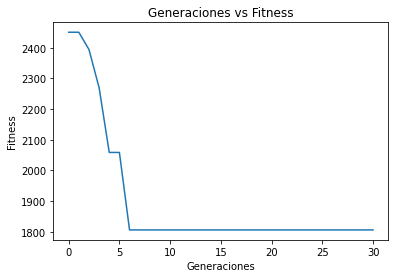

In [7]:
vertices1 = pd.read_csv("../mapas/mapa2/nodes2.csv")
aristas1 = pd.read_csv("../mapas/mapa2/edges2.csv")

g = Graph()
for i in range(vertices1.shape[0]):
  g.agregar_vertice(vertices1["id"][i], vertices1["lon"][i], vertices1["lat"][i],i)

for j in range(aristas1.shape[0]):
  g.agregar_arista(aristas1["source"][j],aristas1["target"][j],aristas1["length"][j])

N = 150
num_padres = 130
s = 9851999130
t = 9291573217

CROSSOVER_RATE = 0.7
MUTATION_RATE = 0.6
GENERACIONES = 30
f = AG_caminoMinimo(N, GENERACIONES, CROSSOVER_RATE, MUTATION_RATE, num_padres, s, t, g)

plt.title("Generaciones vs Fitness")
plt.plot(f)
plt.ylabel("Fitness")
plt.xlabel("Generaciones")
plt.show()

mejor fitness final:  3502.0972757000136


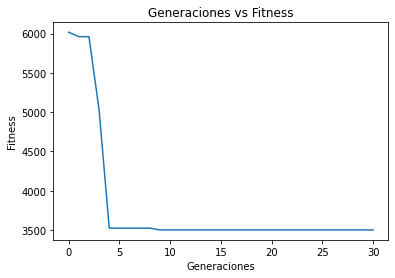

In [8]:
vertices1 = pd.read_csv("../mapas/mapa3/nodes3.csv")
aristas1 = pd.read_csv("../mapas/mapa3/edges3.csv")

g = Graph()
for i in range(vertices1.shape[0]):
  g.agregar_vertice(vertices1["id"][i], vertices1["lon"][i], vertices1["lat"][i],i)

for j in range(aristas1.shape[0]):
  g.agregar_arista(aristas1["source"][j],aristas1["target"][j],aristas1["length"][j])

N = 100
num_padres = 80
s = 4261133139
t = 4436916496

CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.8
GENERACIONES = 30
f = AG_caminoMinimo(N, GENERACIONES, CROSSOVER_RATE, MUTATION_RATE, num_padres, s, t, g)

plt.title("Generaciones vs Fitness")
plt.plot(f)
plt.ylabel("Fitness")
plt.xlabel("Generaciones")
plt.show()